# Solving Differential Equations of Systems of Interactions

Differential equations are central in the mathematical treatment of the dynamics of biological systems. Now that we know how to write the set of differential equations that govern any system of interacting species (using the differential form of Mass Action Law), we will proceed now to integrate them and obtain an analytical solution and extract relevant information.

##  1. Irreversible First Order Reaction 

 We will start with the simplest example of one species  $X_1$ transforming into another $X_2$ with a kinetic constant $k_1$. The scheme of interactions is simply: 

$$ X_1 \overset{k_1}{\longrightarrow} X_2  \tag{1} $$ 

with initial concentrations $X_1(0)$ and $X_2(0)$ and stoichometric matrices

$$
A=\begin{bmatrix}
 1& 0\end{bmatrix} ;
B=\begin{bmatrix}
0 & 1  
\end{bmatrix} ; (B-A)^T= \begin{bmatrix}
 - 1\\ 1 \end{bmatrix} \tag{2}
$$
 
in this particular case

$$
K=\begin{pmatrix}
 k\\ 
\end{pmatrix}
$$

and 

$$X^A=\begin{pmatrix}
X_1^1\cdot X_2^0
\end{pmatrix}
$$

so 

$$
\begin{align}
 \begin{bmatrix}
\frac{\mathrm{d} X_1}{\mathrm{d} t}\\ \frac{\mathrm{d} X_2}{\mathrm{d} t} \end{bmatrix}= \begin{bmatrix}
 - 1\\ 1 \end{bmatrix} \begin{bmatrix}
k \end{bmatrix}\begin{pmatrix}
X_1^1\cdot X_2^0
\end{pmatrix} = \begin{bmatrix}
 - 1\\ 1 \end{bmatrix} \begin{pmatrix}
k \cdot X_1
\end{pmatrix} = \begin{bmatrix}
 - k \cdot X_1\\ k \cdot X_1 \end{bmatrix} 
\end{align}
$$



The set of ODEs that define the system is

$$
\begin{align*}
   \frac{\mathrm{d} X_1}{\mathrm{d} t} &=  - k_1 X_1 \tag{3}\\
   \frac{\mathrm{d} X_2}{\mathrm{d} t} &=   k_1 X_1  \tag{4}\\
\end{align*}
$$

It is called a first order reaction because the rate is proportional to the first power of the concentration of one reactant. Taking eq. 2, we reorganize variables and integrate.

$$\begin{align*}
   \frac{\mathrm{d} X_1}{X_1} &=  - k_1 \mathrm{d}t \tag{5}\\
   \int  \frac{\mathrm{d} X_1}{X_1} &=  \int  - k_1 \mathrm{d}t \tag{6}\\
    \log(X_1(t)) &=  - k_1 t + C  \tag{7}\\
    X_1 (t)&=  e^{- k_1 t + C}  \tag{8}\\
    X_1 (t)&=  e^{- k_1 t}e^{C}  \tag{9}\\
\end{align*}$$

To calculate the integration constant, we use the intial condition at $t=0$.

$$\begin{align*}
    X_1 (0)&=  e^{- k_1 0} e^{C}  \tag{10}\\
    X_1 (0)&=   e^{C}  \tag{11}\\
\end{align*}$$
so the final differential equation for $X_1$ takes the form:

$$ X_1 (t)= X_1 (0) e^{- k_1 t}  \tag{12}$$

Let's use now the conservation of mass to obtain the equation for the reactant $X_2$. Based on this law, if $C \cdot (B-A)^T =0$, then $\sum_{i=1}^{r} C_i \cdot X_i = cte $, so for the case of two variables and one single irreversible reaction 

$$ \begin{align*}
C_1 \cdot X_1 + C_2 \cdot X_2 &= cte \tag{13}\\
\end{align*}$$

so
$$ \begin{align*}
C \cdot (B-A)^T &=0 \tag{14}\\ 
\begin{pmatrix}C_1 & C_2\end{pmatrix} \begin{bmatrix}
 - 1\\ 1 \end{bmatrix}&=0 \tag{15}\\
 -C_1 + C_2 &= 0 \tag{16}\\
 C_1 &= C_2 \tag{17}
\end{align*}$$
Therefore,

$$ \begin{align*}
C_1 \cdot X_1(t) + C_1 \cdot X_2(t) &= cte \tag{18}\\
\end{align*}$$

for any value of $C_1$, so taking $C_1=1$, we have 

$$X_1(t)+X_2(t)=cte \tag{19}$$.

This constant value has to be true also at $t=0$,

$$X_1(t)+X_2(t)= X_1(0)+X_2(0) = cte \tag{20}$$.

using this conservation of mass, we can also obtain the analytical solution for $X_2$:

$$ \begin{align*}
X_2 (t) &= X_1 (0) + X_2 (0) - X_1 (t)\tag{21} \\
X_2 (t) &= X_1 (0) + X_2 (0) - X_1 (0) e^{- k_1 t}  \tag{22}\\
X_2 (t) &=  X_2 (0) + X_1 (0) (1-e^{- k_1 t})  \tag{23}
\end{align*}$$

### <font color=red>Computer Exercise:</font>

Write a computer program that consists on a function that takes as input the time of the reaction, a vector of initial concentrations of the species $X_i$ and the reaction rate $k$ and plots the time evolution of the variables $X_i(t)$ for an irreversible first order reaction.

In [2]:
t₀=0
t_final=10
X₀ = [0.1,0.0] # initial concentations
k_1 = 1.; # kinetic rate constant

In [3]:
using Plots
gr()

Plots.GRBackend()

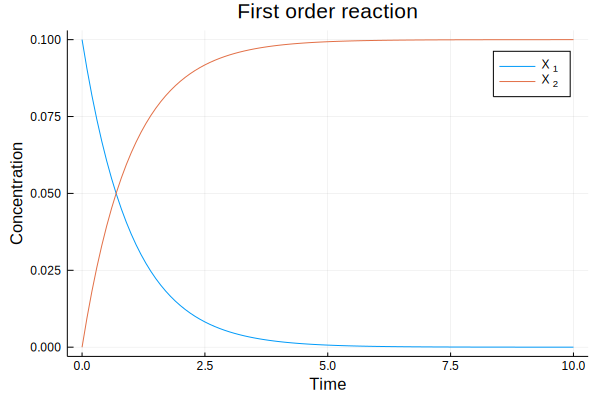

In [4]:
t=collect(t₀:0.1:t_final) # time
plot(t,t->X₀[1]*exp(-k_1*t),label="\\ X_1",seriestype=:line)
plot!(t,t->X₀[2]+X₀[1]*(1-exp(-k_1*t)),label="\\ X_2",seriestype=:line)
title!("First order reaction")
xaxis!("Time")
yaxis!("Concentration")

## 2. Reversible First Order Reaction

Another simple example that can be solved analytically is the reversible first order reaction :

$ X_1 \overset{k_1}{\underset{k_2}{\longleftrightarrow}} X_2  \tag{24} $


$$
A=\begin{bmatrix}
 1 & 0\\
 0 & 1 \end{bmatrix} ;
B=\begin{bmatrix}
0 & 1\\
 1 & 0  
\end{bmatrix} ; (B-A)^T= \begin{bmatrix}
-1 & 1\\
 1 & -1   \end{bmatrix} \tag{25}
$$

 in this particular case

$$
K=\begin{pmatrix}
 k_1 & 0\\
 0 & k_2
\end{pmatrix} \tag{26}
$$


$$X^A=\begin{pmatrix}
X_1^1\cdot X_2^0\\
X_1^0\cdot X_2^1
\end{pmatrix} = \begin{pmatrix}
X_1\\
 X_2
\end{pmatrix}  \tag{27}
$$

so 

$$
\begin{align}
 \begin{bmatrix}
\frac{\mathrm{d} X_1}{\mathrm{d} t}\\ \frac{\mathrm{d} X_2}{\mathrm{d} t} \end{bmatrix}= \begin{bmatrix}
-1 & 1\\
 1 & -1   \end{bmatrix} \begin{pmatrix}
 k_1 & 0\\
 0 & k_2
\end{pmatrix}\begin{pmatrix}
X_1\\
 X_2
\end{pmatrix}  
\end{align}
$$

$$
\begin{align}
\begin{bmatrix}
\frac{\mathrm{d} X_1}{\mathrm{d} t}\\ \frac{\mathrm{d} X_2}{\mathrm{d} t} \end{bmatrix}=  \begin{bmatrix}
-1 & 1\\
 1 & -1   \end{bmatrix}\begin{pmatrix}
k_1 \cdot X_1\\
  k_2 \cdot X_2
\end{pmatrix} =   \begin{bmatrix}
- k_1 \cdot X_1 +  k_2 \cdot X_2\\
 k_1 \cdot X_1 -k_2 \cdot X_2   \end{bmatrix}
\end{align} \tag{28}
$$



The differential equations of the system can be written using the differential form of Mass Action Law as: 

$$\begin{align}
\frac{dX_1}{dt} = -k_1 \cdot X_1 +k_2 \cdot X_2 \tag{29}\\
\frac{dX_2}{dt} = k_1 \cdot X_1 - k_2 \cdot X_2 \tag{30}\\
\end{align}$$

The mass conservation law is equivalent to the previous case (only $X_1$ and $X_2$ as reactants). We start by using mass conservation to de-couple the two equations. For the first one we have:

$$\begin{align}
\frac{dX_1}{dt} = k_2\left( X_1(0)+X_2(0)-X_1\right)-k_1X_1 \tag{31}\\
\end{align}$$

which, when we rearrange terms becomes:
$$\frac{dX_1}{dt}+\left(k_2+k_1\right)X_1=k_2\left( X_1(0)+X_2(0)\right) \tag{32}$$

To solve this diferential equation, we need to calculate the integration factor, $e^{ \int p(x)dx }$, that allows us to put the first term of the equation as one diferentiation. In this case $p(x)=k_2+k1 $, so $e^{ \int (k_2+k1)dt }=e^{(k_2+k1)t}$. This way, when we multiply both terms in eq. 18 by the integrating factor, we obtain:

$$\frac{dX_1}{dt} e^{(k_2+k1)t} +\left(k_2+k_1\right) e^{(k_2+k1)t} X_1 = \left( X_1(0)+X_2(0)\right) k_2 e^{(k_2+k1)t} \tag{33}$$

The first term now is the derivative of $X_1 \cdot  e^{(k_2+k1)t}$ so we can reqwrite:

$$\frac{d(X_1 e^{(k_2+k1)t})}{dt} = \left( X_1(0)+X_2(0)\right) k_2 e^{(k_2+k1)t} \tag{34}$$

we move the `dt` to the right side we integrate 

$$ \int d(X_1 e^{(k_2+k1)t}) = \left( X_1(0)+X_2(0)\right) k_2 \int e^{(k_2+k1)t} dt \tag{35}$$

solving

$$ X_1 e^{(k_2+k1)t} = \frac{\left( X_1(0)+X_2(0)\right) k_2}{k_2+k1}  e^{(k_2+k1)t} + C \tag{36}$$

rearranging terms becomes

$$ X_1 (t) = \frac{\left( X_1(0)+X_2(0)\right) k_2}{k_2+k1} + C \cdot e^{-(k_2+k1)t} \tag{37}$$

to calculate the integration constant we use initial value of $X_1$

$$
\begin{align}
X_1 (0) &= \frac{\left( X_1(0)+X_2(0)\right) k_2}{k_2+k1} + C \cdot e^{-(k_2+k1)0} \tag{38}\\
X_1 (0) &=\frac{\left( X_1(0)+X_2(0)\right) k_2}{k_2+k1} + C \tag{39}\\
C&= X_1 (0) - \frac{\left( X_1(0)+X_2(0)\right) k_2}{k_2+k1} \tag{40}\\
C&= \frac{X_1 (0)(k_2 + k 1) - X_1(0) k_2 - X_2(0) k_2 }{k_2+k1}\tag{41} \\
C&= \frac{X_1 (0) k 1 - X_2(0) k_2 }{k_2+k1}\tag{42} \\
\end{align}$$


Therefore the full solutions for $X_1$ is:
$$\label{eq:aeq} X_1(t)=\frac{k_2\left ( X_1(0)+X_2(0) \right )}{k_1+k_2}+\frac{k_1 X_1(0)-k_2X_2(0) }{k_1+k_2}e^{-\left (k_1+k_2)\right )t} \tag{43}$$


In this case, the conservation of mass is exactly the same as the previous case of irreversible reaction, so:
$$X_1(t)+X_2(t)=X_1(0)+X_2(0) \tag{44} $$


and, using the conservation of mass, the solution for $X_2$ is
$$ 
\begin{align}
X_2(t)&=X_1(0)+X_2(0)-\frac{k_2\left ( X_1(0)+X_2(0) \right )}{k_1+k_2}-\\
& - \frac{k_1 X_1(0)-k_2X_2(0) }{k_1+k_2}e^{-\left (k_1+k_2)\right )t} \tag{45}\\
X_2(t)&=\frac{(k_1+k_2)(X_1(0)+X_2(0))} {k_1+k_2}- \\ 
& - \frac{k_2\left ( X_1(0)+X_2(0) \right )}{k_1+k_2}-\frac{k_1 X_1(0)-k_2X_2(0) }{k_1+k_2}e^{-\left (k_1+k_2)\right )t} \tag{46}\\
X_2(t)&=\frac{k_1 (X_1(0)+X_2(0))} {k_1+k_2}+ \frac{k_2 (X_1(0)+X_2(0))}{k_1+k_2} - \\ 
& -\frac{k_2\left ( X_1(0)+X_2(0) \right )}{k_1+k_2}-\frac{k_1 X_1(0)-k_2X_2(0) }{k_1+k_2}e^{-\left (k_1+k_2)\right )t} \tag{47}
\end{align}$$

so the final set of equations is:
$$
\begin{align}
X_1(t)&=\frac{k_2\left ( X_1(0)+X_2(0) \right )}{k_1+k_2}+\frac{k_1 X_1(0)-k_2X_2(0) }{k_1+k_2}e^{-\left (k_1+k_2)\right )t} \tag{48}\\
X_2(t)&=\frac{k_1 (X_1(0)+X_2(0))} {k_1+k_2}-\frac{k_1 X_1(0)-k_2X_2(0) }{k_1+k_2}e^{-\left (k_1+k_2)\right )t} \tag{49}
\end{align}$$

where the equilibrium concentrations for $X_1$ and $X_2$ can be calculated using limits: 

$$
\begin{align}X_1(t->inf)\frac{k_2\left ( X_1(0)+X_2(0) \right )}{k_1+k_2} \tag{50}\\
X_2(t->inf)\frac{k_1\left ( X_1(0)+X_2(0) \right )}{k_1+k_2} \tag{51}
\end{align}$$

### <font color=red>Computer Exercise:</font> 

Write a computer program that consists on a function that takes as input the time of the reaction, a vector of initial concentrations of the species $X_i$ and the reaction rate $k$ and plots the time evolution of the variables $X_i(t)$ for a reversible first order reaction. 

In [5]:
t₀=0
t_final=10
k_1 = 1
k_2 = 0.5
X₀ = [0.5,0.2]; # Initial concentrations

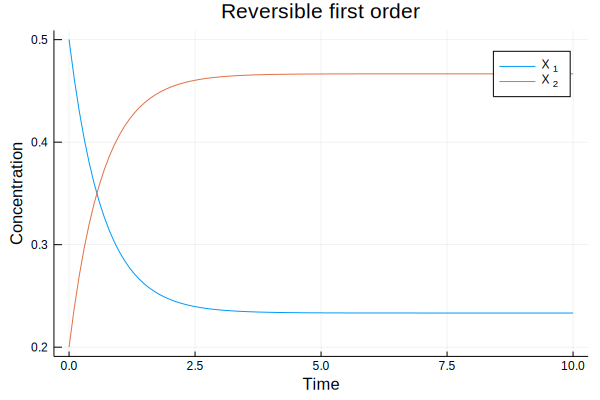

In [5]:
t=collect(0:0.1:10) # time
plot(t,t->((k_2*(X₀[1]+X₀[2]))/(k_1+k_2)) + ((k_1*X₀[1]-k_2*X₀[2])/(k_1+k_2))*exp(-t*(k_1+k_2)),label="\\ X_1",seriestype=:line)
plot!(t,t->X₀[1] + X₀[2] - ((k_2*(X₀[1]+X₀[2]))/(k_1+k_2)) - ((k_1*X₀[1]-k_2*X₀[2])/(k_1+k_2))*exp(-t*(k_1+k_2)),label="\\ X_2",seriestype=:line)
title!("Reversible first order")
xaxis!("Time")
yaxis!("Concentration")

## 3. Second order reaction: irreversible dimerization

A special case of second order reaction is when conversion into product occur in pairs. This corresponds to a situation known as dimerization, very common in biology. In the next section, we will derive the solution for this scheme of interaction, where two identical molecules interact to form a complex. The general scheme of interaction is the following:

$$ 2X_1 \overset{k_1}{\longrightarrow} X_2  \tag{52} $$ 

with initial concentrations $X_1(0)$ and $X_2(0)$ and stoichometric matrices

$$
A=\begin{bmatrix}
 2& 0\end{bmatrix} ;
B=\begin{bmatrix}
0 & 1  
\end{bmatrix} ; (B-A)^T= \begin{bmatrix}
 - 2\\ 1 \end{bmatrix} \tag{53}
$$
 
in this particular case

$$
K=\begin{pmatrix}
 k_1\\ 
\end{pmatrix} \tag{54}
$$

and 

$$X^A=\begin{pmatrix}
X_1^2\cdot X_2^0
\end{pmatrix} \tag{55}
$$

so 

$$
\begin{align}
 \begin{bmatrix}
\frac{\mathrm{d} X_1}{\mathrm{d} t}\\ \frac{\mathrm{d} X_2}{\mathrm{d} t} \end{bmatrix}= \begin{bmatrix}
 - 2\\ 1 \end{bmatrix} \begin{bmatrix}
k_1 \end{bmatrix}\begin{pmatrix}
X_1^2\cdot X_2^0
\end{pmatrix} = \begin{bmatrix}
 - 2\\ 1 \end{bmatrix} \begin{pmatrix}
k_1 \cdot X_1^2
\end{pmatrix} = \begin{bmatrix}
 - 2 k_1 X_1^2\\ k_1  X_1^2 \end{bmatrix}  \tag{56}
\end{align}
$$

$$
\begin{align*}
   \frac{\mathrm{d} X_1}{\mathrm{d} t} &=  - 2 k_1 X_1^2 \tag{57}\\
   \frac{\mathrm{d} X_2}{\mathrm{d} t} &=    k_1 X_1^2  \tag{58}\\
\end{align*}
$$

It is called a second order reaction because the rate is proportional to the second power of the concentration of reactant. Taking the first differential equation, we reorganize variables and integrate.
$$\begin{align*}
   \frac{\mathrm{d} X_1}{X_1^2} &=  - 2k_1 \mathrm{d}t \tag{59}\\
   \int  \frac{\mathrm{d} X_1}{X_1^2} &=  \int  - 2k_1 \mathrm{d}t \tag{60}\\
     \frac{-1}{X_1} &=  - 2k_1 \cdot t + C \tag{61}\\
     X_1(t) &=\frac{1}{2k_1 \cdot  t - C}  \tag{62}\\
\end{align*}$$

To calculate the integration constant, we use the intial condition at $t=0$.

$$\begin{align*}
     X_1(0) &=\frac{1}{2k_1  \cdot 0 - C} = - \frac{1}{C} \tag{63}
\end{align*}$$


so the final equation of is
$$\begin{align}
X_1(t) &=\frac{1}{2k_1 \cdot t + \frac{1}{X_1(0)} } \tag{64}
\end{align}$$
so, multiplying numerator and denominator of the right side of the equation by $X_1(0)$ we obtain
$$\begin{align}
X_1(t) &=\frac{X_1(0)}{(X_1(0))(2 k_1  \cdot t  + \frac{1}{X_1(0)}) }= \frac{X_1(0)}{2k_1 X_1(0) \cdot t + 1}\tag{65}
\end{align}$$


Let's use now the conservation of mass to obtain the equation for the reactant $X_2$. Remember, if $C \cdot (B-A)^T =0$, then $\sum_{i=1}^{r} C_i \cdot X_i = cte $, so

$$ \begin{align*}
C_1 \cdot X_1 + C_2 \cdot X_2 &= cte \tag{66}\\
\end{align*}$$

so
$$ \begin{align*}
C \cdot (B-A)^T &=0 \tag{67}\\ 
\begin{pmatrix}C_1 & C_2\end{pmatrix} \begin{bmatrix}
 - 2\\ 1 \end{bmatrix}&=0\tag{68}\\
 -2 C_1 + C_2 &= 0 \tag{69}\\
 2 C_1 &= C_2 \tag{70}
\end{align*}$$
Therefore,

$$ \begin{align*}
 C_1 \cdot X_1(t) + 2 C_1 \cdot X_2(t) &= cte \tag{71}\\
\end{align*}$$

for any value of $C_1$, so taking $C_1=1$, we have 

$$X_1(t)+ 2 X_2(t)=cte \tag{72}$$.

This constant value has to be true also at $t=0$,

$$X_1(t)+2 X_2(t)= X_1(0)+ 2 X_2(0) = cte \tag{77}$$.

using this restriction, we obtain for $X_2$:
$$\begin{align}
X_2(t) &=  \frac{X_1(0)}{2}+ X_2(0) - \frac{X_1(0)}{4k_1 X_1(0) \cdot t + 1}\tag{78}\\
X_2(t) &= X_2(0) +  \frac{X_1(0)}{2} (1 - \frac{1}{2k_1 X_1(0) \cdot t + 1})\tag{79}\\
X_2(t) &= X_2(0) +  \frac{X_1(0)}{2} \frac{2k_1 X_1(0)t}{2k_1 X_1(0) \cdot t + 1}\tag{80}\\
X_2(t) &= X_2(0) +  \frac{k_1 X_1(0)^2 t}{2k_1 X_1(0) \cdot t + 1}\tag{81}\\
\end{align}$$




### <font color=red>Computer Exercise:</font> 

Write a computer program that consists on a function that takes as input the time of the reaction, a vector of initial concentrations of the species $X_i$ and the reaction rate $k$ and plots the time evolution of the variables $X_i(t)$ for an irreversible dimerization reaction.

Compare the dynamics of consumption of $X_1$ between this second order reaction and the firts order irrevensible reaction. Why are they so different, even when we use the exact same values?

In [6]:
t₀=0
t_final=10
X₀ = [0.1,0.0] # initial concentations
k_1 = 1.; # kinetic rate constant

1.0

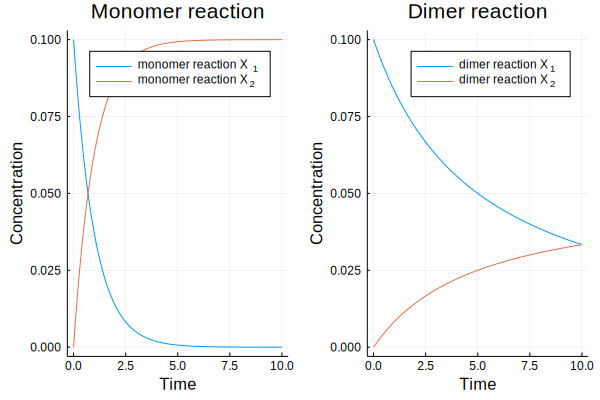

In [7]:
t=collect(0:0.1:10) # time
P1=plot(t,t->X₀[1]*exp(-k_1*t),label="monomer reaction \\  X_1",seriestype=:line)
P1=plot!(t,t->X₀[2]+X₀[1]*(1-exp(-k_1*t)),label="monomer reaction \\ X_2",seriestype=:line)
title!("Monomer reaction")
P2=plot(t,t->X₀[1]/((2*k_1*t*X₀[1])+1),label="dimer reaction \\ X_1 ")
P2=plot!(t,t->X₀[2]+(k_1*t*X₀[1]^2)/((2*k_1*t*X₀[1])+1),label="dimer reaction \\ X_2 ")
title!("Dimer reaction")


plot(P1,P2,layout=(1,2),legend=true)

xaxis!("Time")
yaxis!("Concentration")

This difference in the dynamcis occurs mainly because you cannot compare directy a first order and a second order reaction, since the kinetic constants do not have the same units, as we already know you cannot compare. After adjusting the value of $k_1$ in the dimer reaction by dividing it by the initial concentration of $X_1$, we have a more similar behavior, but still quite different.

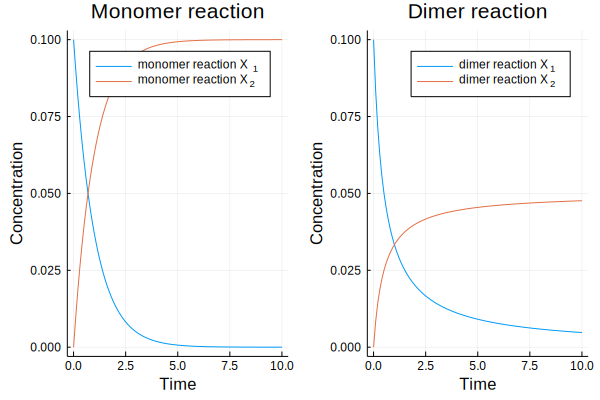

In [45]:
X₀ = [0.1,0.0]
k_1 = 1.
P1=plot(t,t->X₀[1]*exp(-k_1*t),label="monomer reaction \\  X_1",seriestype=:line)
P1=plot!(t,t->X₀[2]+X₀[1]*(1-exp(-k_1*t)),label="monomer reaction \\ X_2",seriestype=:line)
title!("Monomer reaction")
k_1 = 1. / X₀[1]
P2=plot(t,t->X₀[1]/((2*k_1*t*X₀[1])+1),label="dimer reaction \\ X_1 ")
P2=plot!(t,t->X₀[2]+(k_1*t*X₀[1]^2)/((2*k_1*t*X₀[1])+1),label="dimer reaction \\ X_2 ")
title!("Dimer reaction")


plot(P1,P2,layout=(1,2),legend=true)

xaxis!("Time")
yaxis!("Concentration")

After adjusting the value of $k_1$ in the dimer reaction by dividing it by the initial concentration of $X_1$, we have a more similar behavior, but still quite different.

## Reversible Dimerization

Another simple reaction scheme is the reversible dimerization (a second order reaction forward and a first order reaction backwards):

$ 2 X_1 \overset{k_1}{\underset{k_2}{\longleftrightarrow}} X_2  \tag{82} $


$$
A=\begin{bmatrix}
 2 & 0\\
 0 & 1 \end{bmatrix} ;
B=\begin{bmatrix}
0 & 1\\
 2 & 0  
\end{bmatrix} ; (B-A)^T= \begin{bmatrix}
-2 & 2\\
 1 & 1   \end{bmatrix}  \tag{83} 
$$

 in this particular case

$$
K=\begin{pmatrix}
 k_1 & 0\\
 0 & k_2
\end{pmatrix} \tag{83} 
$$


$$X^A=\begin{pmatrix}
X_1^2 X_2^0\\
X_1^0 X_2^1
\end{pmatrix} = \begin{pmatrix}
X_1^2\\
 X_2
\end{pmatrix} \tag{84} 
$$

so 

$$
\begin{align}
 \begin{bmatrix}
\frac{\mathrm{d} X_1}{\mathrm{d} t}\\ \frac{\mathrm{d} X_2}{\mathrm{d} t} \end{bmatrix}= \begin{bmatrix}
-2 & 2\\
 1 & -1   \end{bmatrix} \begin{pmatrix}
 k_1 & 0\\
 0 & k_2
\end{pmatrix}\begin{pmatrix}
X_1^2\\
 X_2
\end{pmatrix}  =  \begin{bmatrix}
-2 & 2\\
 1 & -1   \end{bmatrix}\begin{pmatrix}
k_1  X_1^2\\
  k_2 X_2
\end{pmatrix} =   \begin{bmatrix}
- 2 k_1  X_1^2 +  2 k_2  X_2\\
 k_1  X_1^2 - k_2  X_2   \end{bmatrix} \tag{85} 
\end{align}
$$


The differential equations of the system can be written using the differential form of Mass Action Law as: 

$$\begin{align}
\frac{dX_1}{dt} = - 2k_1 \cdot X_1^2 + 2k_2 \cdot X_2 \tag{86} \\
\frac{dX_2}{dt} = k_1 \cdot X_1^2 - k_2 \cdot X_2 \tag{87} \\
\end{align}$$

The mass conservation law is equivalent to the previous case (only $X_1$ and $X_2$ as reactants). $X_2(t) =  \frac{X_1(0)}{2}+ X_2(0) - \frac{X_1(t)}{2}$ We start by using mass conservation to de-couple the two equations. For the first one we have:

$$\begin{align}
\frac{dX_1(t)}{dt} =  k_2 \left(X_1(0)+ 2 X_2(0)- X_1(t)\right)- 2k_1X_1(t)^2 \tag{88} \\
\end{align}$$
We can solve the integral but we cannot express the value of $X_1$ directly as a function of $t$, so we have to solve it using other methods. We will learn how to do this in the next class. 

## 3. General Second Order Reaction: 

Consider the second order reaction $$ X_1 + X_2 \overset{k}{\longrightarrow} X_3  \tag{63} $$. This corresponds to a typical example of formation of a dimer complex.

$$\begin{align}
\frac{dX_1}{dt} &= -k \cdot X_1 \cdot X_2\tag{64}\\
\frac{dX_2}{dt} &= -k \cdot X_1 \cdot X_2 \tag{65}\\
\frac{dX_3}{dt} &= k \cdot X_1 \cdot X_2 \tag{66}\\
\end{align}$$

to solve this set of ODEs, we will have to consider two separate situations $[X_1](0) \neq [X_2](0)$ and $[X_1](0) = [X_2](0)$.

### 3.1 Situation $[X_1](0) \neq [X_2](0)$

We will define `x` as the concentration of each species that have reacted at time `t`. Since both change at the same rate, we can  rewrite the expression of rate law as:

$$\begin{align}
\frac{dX_1}{dt} &= -k \cdot (X_1(0)-x) \cdot (X_2(0)-x)\tag{67}\\
\frac{dX_2}{dt} &= -k \cdot (X_1(0)-x) \cdot (X_2(0)-x) \tag{68}\\
\frac{dX_3}{dt} &= k \cdot (X_1(0)-x) \cdot (X_2(0)-x) \tag{69}
\end{align}$$

for the derivatives we can also write:

$$\begin{align}
\frac{dX_1}{dt} &=  \frac{dX_1(0)}{dt} -  \frac{dx}{dt} = -\frac{dx}{dt} \tag{70}\\
\frac{dX_2}{dt} &= \frac{dX_2(0)}{dt} -  \frac{dx}{dt} = -\frac{dx}{dt} \tag{71}
\end{align}$$

therefore, we rewrite the full set of equations in terms of `x` and the initial conditions:
$$\begin{align}
\frac{dX_1}{dt} & = -\frac{dx}{dt} = -k \cdot (X_1(0)-x) \cdot (X_2(0)-x)\tag{72}\\
\frac{dX_2}{dt} & = -\frac{dx}{dt} = -k \cdot (X_1(0)-x) \cdot (X_2(0)-x) \tag{73}\\
\end{align}$$


we can rearrange the equations as we often do:
$$\begin{align}
 \frac{dx}{(X_1(0)-x) \cdot (X_2(0)-x)} = k dt \tag{74}\\
\end{align}$$

We now integrate between  t=0(when  x=0 t= t, the time of interest.

$$\begin{align}
 \int\frac{dx}{(X_1(0)-x) \cdot (X_2(0)-x)} = k \int  dt \tag{75}\\
\end{align}$$
we separate the left part into two integrals by using the scheme:

$$\begin{align}
\frac{1}{(a-x)(b-x)}  &= \frac{A}{a-x} + \frac{B}{b-x} \tag{76}
\end{align}$$

we need to find the values for `A` and `B`, which in this case can be obtained by solving:

$$\begin{align}
A (b-x) + B (a-x) &= 1 \tag{77}\\
Ab - Ax + Ba - Bx &= 1 \tag{78}\\
(bA + Ba) - x (A + B) + &= 1 \tag{79}
\end{align}$$

this is true if $A + B=0$ and $bA + Ba=1$ so, we substitute  $B=-A$ in the second equation and obtain

$$\begin{align}
bA - Aa &= 1 \tag{80}\\
A &= \frac{1}{b-a} \tag{81}\\
B &= -\frac{1}{b-a} \tag{82}
\end{align}$$

so the equation becomes:

$$\begin{align}
\frac{1}{(a-x)(b-x)}  &= \frac{1}{b-a}(\frac{1}{a-x} + \frac{1}{b-x}) \tag{83}
\end{align}$$


applying this solution to the left side of the equation above 

$$\begin{align}
 \frac{dx}{(X_1(0)-x) \cdot (X_2(0)-x)} = \frac{1}{X_2(0)-X_1(0)}(\frac{dx}{X_1(0)-x} - \frac{dx}{X_2(0)-x})\tag{84}\\
\end{align}$$

so the equation becomes:

$$\begin{align}
 \frac{1}{X_2(0)-X_1(0)}(\int\frac{dx}{X_1(0)-x} - \int \frac{dx}{X_2(0)-x}) = k_1 \int  dt \tag{85}\\
\end{align}$$

solving 


$$\begin{align}
\frac{1}{X_2(0)-X_1(0)}\left(-\ln(X_1(0) - x) + \ln(X_2(0) - x)\right) = k_1 \, t + C \tag{86}
\end{align}$$

using the definition of `x`

$$
\dfrac{1}{X_2(0)-X_1(0)}\left(-\ln X_1 + \ln X_2 \right)=  k_1 \, t + C \tag{87}
$$

using the properties of logs

$$
\dfrac{1}{ } \ln\dfrac{X_2}{X_1}=  k_1 \, t + C \tag{88}
$$

and rearranging terms 

$$
\ln\dfrac{X_2}{X_1}= (k_1 \, t + C) (X_2(0)-X_1(0))\tag{89}
$$

to determinte C, we use the initial condition 

$$\begin{align}
\ln\dfrac{X_2(0)}{X_1(0)}= (k_1 \, 0 + C) (X_2(0)-X_1(0))\tag{90}\\
C = \dfrac{1}{X_2(0)-X_1(0)} \ln\dfrac{X_2(0)}{X_1(0)}   \tag{91}
\end{align}$$


so the final solution is
$$
\ln\dfrac{X_2 }{X_1}= (k \, t + \dfrac{1}{(X_2(0)-X_1(0))} \ln\dfrac{X_2(0)}{X_1(0)}) \, ( X_2(0)-X_1(0)) =(k \, t (X_2(0)- X_1(0)) + \ln\dfrac{X_2(0)}{X_1(0)})\tag{92}
$$
 rearranging terms
 
 $$
\dfrac{X_2 }{X_1 }= e^{(k \, t ( X_2(0)-X_1(0)) + \ln\dfrac{X_2(0)}{X_1(0)})}=e^{(k \, t ( X_2(0)-X_1(0))}  e^{\ln\dfrac{X_2(0)}{X_1(0)})}\tag{93}
$$

In conclusion, in this simple second order reaction, we cannot calculate analitically $X_1$ and $X_2$, just a relation between them 

$$
\dfrac{X_2}{X_1}= \dfrac{X_2(0)}{X_1(0)} e^{k \, t \, (X_2(0)- X_1(0))} \tag{94}
$$


### 3.2 Situation $[X_1](0) = [X_2](0)$

Since $X_1$ and $X_2$  react 1 to 1, allways the concetration of $X_1=X_2 $, therefore, we can use the same solution as in the previous second order reaction.

$$\text{rate} = k[X_1][X_2] = k[X_1][X_1] = k[X_1]^2 \tag{95}$$

The equations are simply:
$$
\begin{align}
\dfrac{d[X_1]}{dt} = -  k_1\,[X_1]^2 \tag{96}\\
\dfrac{d[X_2]}{dt} =  -  k_1\,[X_1]^2 \tag{97}\\
\dfrac{d[X_3]}{dt} =  k_1\,[X_1]^2 \tag{98}
\end{align}$$

The conservation of mass is now $ X_1 (t)+X_2 (t) + 2 X_3 (t) = 2 X_1 (t) + 2 X_3 (t) = 2 X_1 (0) + 2 X_3 (0) $. Taking eq. 2, we reorganize variables and integrate.

$$\begin{align*}
   \frac{\mathrm{d} X_1}{X_1^2} &=  - k_1 \mathrm{d}t \tag{99}\\
   \int  \frac{\mathrm{d} X_1}{X_1^2} &=  \int  - k_1 \mathrm{d}t \tag{100}\\
     \frac{-1}{X_1} &=  - k_1 t + C \tag{101}\\
     X_1(t) &=\frac{1}{k_1   t - C}  \tag{102}\\
\end{align*}$$

To calculate the integration constant, we use the intial condition at $t=0$.

$$\begin{align*}
     X_1(0) &=\frac{1}{k_1   0 - C} = - \frac{1}{C} \tag{103}
\end{align*}$$


so the final equation of is
$$\begin{align}
X_1(t) &=\frac{1}{k_1  t + \frac{1}{X_1(0)} } \tag{104}
\end{align}$$
so, multiplying numerator and denominator of the right side of the equation by $X_1(0)$ we obtain
$$\begin{align}
X_1(t) &=\frac{X_1(0)}{(X_1(0))( k_1  t  + \frac{1}{X_1(0)}) }= \frac{X_1(0)}{k_1 X_1(0)t + 1}\tag{105}
\end{align}$$

taking the conservation of mass we have:

$$\begin{align}
X_3(t) &= X_3 (0) + 2 X_1 (0) -  \frac{X_1(0)}{k_1 X_1(0)t + 1}=X_3 (0) +  X_1 (0) (1- \frac{1}{k_1 X_1(0)t + 1})\tag{106}
\end{align}$$

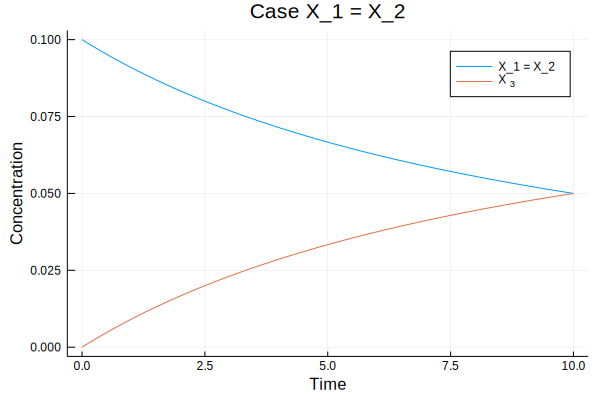

In [40]:
k_1 = 1.
X₀ = [0.1,0.1,0.]
plot(t,t->X₀[1]/((k_1*t*X₀[1])+1),label=" X_1 = X_2")
plot!(t,t->X₀[3]+X₀[1]*(1-1/((k_1*t*X₀[1])+1)),label="\\ X_3 ")
title!("Case  X_1  =  X_2 ")
xaxis!("Time")
yaxis!("Concentration")